In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
gifted = pd.read_csv("../data/processed/masterbuild_master.csv")
curtest = pd.read_csv("../data/processed/curtest_master.csv")

/var/folders/dk/2mw0y5w91dggrsnrpxb04jv80000gn/T/ipykernel_26521/122745068.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  gifted = pd.read_csv("../data/processed/masterbuild_master.csv")
/var/folders/dk/2mw0y5w91dggrsnrpxb04jv80000gn/T/ipykernel_26521/122745068.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  curtest = pd.read_csv("../data/processed/curtest_master.csv")


In [16]:
# Step 1: Find mastids that appear more than twice
mastid_counts = gifted['mastid'].value_counts()
mastids_more_than_twice = mastid_counts[mastid_counts > 2].index

# Step 2: Filter the DataFrame to include only those mastids
gifted_filtered = gifted[gifted['mastid'].isin(mastids_more_than_twice)]

# Step 3: View the result
print(gifted_filtered)


           mastid  lea  schlcode  grade ethnic sex aig aig_code eds  \
233     7806276.0  180       376      9      H   F   Y       AM   Y   
320     7481646.0  610       334     11      W   M   Y       AG   N   
321     7481646.0  060       700     11      W   M   Y       AG   N   
3578    7463009.0  340       454      9      W   M   Y       AG   N   
3999    7465765.0  340       382      9      W   M   Y       AG   N   
...           ...  ...       ...    ...    ...  ..  ..      ...  ..   
682895  9023948.0  620       339      7      W   M   Y       IG   N   
682898  9644831.0  470       442      6      W   F   Y       AG   N   
682905  9427541.0  350       312      6      W   F   Y       AR   Y   
682909  9460601.0  180       320     10      W   M   Y       AG   N   
682910  9250577.0  410       325      6      W   F   Y       AG   N   

        reporting_year  mpw  
233             2018.0  NaN  
320             2018.0  NaN  
321             2018.0  NaN  
3578            2018.0  NaN

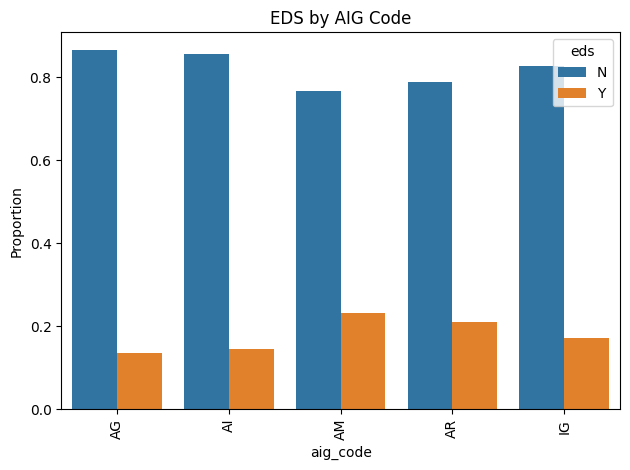

In [17]:
counts = gifted.groupby(['aig_code', 'eds']).size().reset_index(name='count')

# Calculate total per aig_code
counts['total'] = counts.groupby('aig_code')['count'].transform('sum')

# Compute proportions
counts['proportion'] = counts['count'] / counts['total']
sns.barplot(data=counts, x='aig_code', y='proportion', hue='eds')
plt.ylabel('Proportion')
plt.title('EDS by AIG Code')
plt.xticks(rotation=90)  # Optional: rotates x labels if they’re long
plt.tight_layout()
plt.show()
